## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

In [ ]:
#Here i'll write down my aims for this session:
#1. Put the asserts where i want the asserts to be
#2. Figuring out how to do the comments
#3. Figure out where i'm getting issues and then point them out to figure out later

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

In [ ]:
# Points class

class Point :
    """
    Represents a point in a 2D space
    
    attributes: x, y, name
    
    """
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""):
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42
        
    def __add__(self, other) :
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point
    
    def print_point(self) :
        print("Point ", self.name, "is", self.x, self.y)
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x += dx
        self.y += dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name
        
        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()


#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?
    


In [ ]:
class Rectangle_By_A_Tutor:

    def __init__(self, bottom_left_corner = [0,0], width, height):
        self.bottom_left_corner = self.bottom_left_corner
        self.width = width
        self.height = height

    def reflect_in_x_axis():
        self.bottom_left_corner = -self.bottom_left_corner
        return self

    def stretch_with_fixed_bottom_left(amount):
        self.width = amount*self.width
        self.height = amount*self.height
        return self

    def plot():
        """simply use height and width to find the other 3 corners"""

    def stretch_with_fixed_top_right(amount):

        new_width = amount*self.width
        new_height = amount*self.height
        self.bottom_left_corner = [self.bottom_left_corner[0] - (new_width-self.width), self.bottom_left_corner[1] - (new_height-self.height)]
        self.width = new_width
        self.height = new_height
        return self 

        


In [13]:
# Rectangle class
class Rectangle :
    #Note; these have no tests because im tired and cranky
    
    #constructor method
    def __init__(self, north_west_point=[-1,1], south_west_point=[-1,-1], north_east_point=[1,1], south_east_point=[1,-1]) :

        self.north_west_point = north_west_point
        self.south_west_point = south_west_point
        self.north_east_point = north_east_point
        self.south_east_point = south_east_point
        
    def reflect_on_x(self):
        for point in [self.north_west_point,self.south_west_point,self.north_east_point,self.south_east_point]:
            point[1] = -(point[1])
        a = self.north_west_point
        b = self.north_east_point
        c = self.south_west_point
        d = self.south_east_point
        self.north_east_point = d
        self.north_west_point = c
        self.south_east_point = b
        self.south_west_point = a
        return self

    def increase_south_west(self,x):
        height = self.north_west_point[1] - self.south_west_point[1]
        width = self.north_east_point[0] - self.north_west_point[0]
        self.north_west_point[1] = self.south_west_point[1] + x*height
        self.north_east_point[1] = self.south_west_point[1] + x*height
        self.north_east_point[0] = self.south_west_point[0] + x*width
        self.south_east_point[0] = self.south_west_point[0] + x*width
        return self

    def plot_rectangle(self):
        for y_index in [self.north_west_point[1], self.south_west_point[1]]:
            plt.hlines(y_index,self.north_west_point[0],self.north_east_point[0])
        for x_index in [self.north_west_point[0], self.south_east_point[0]]:
            plt.vlines(x_index,self.north_west_point[1],self.south_east_point[1])
        plt.show()

    def print(self) :
        print(self.south_west_point)

# UPDATE ME!
# QUESTION: How does one put an assert in a class?

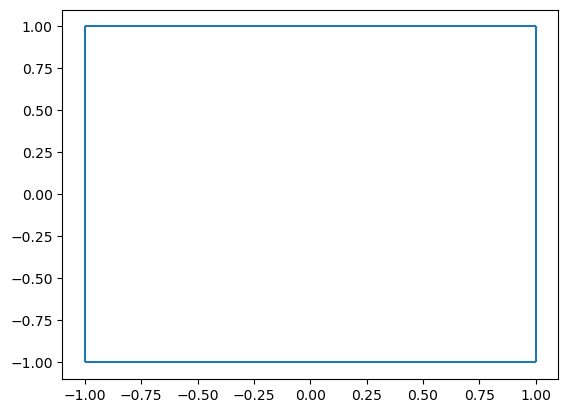

[-1, -1]


In [14]:
myrec=Rectangle()
myrec.plot_rectangle()
myrec.print()
# UPDATE ME!

### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


In [ ]:
# Square class
class Square(Rectangle):
    def __init__(self, north_west_point=[-1,1], south_west_point=[-1,-1], north_east_point=[1,1], south_east_point=[1,-1]) :
        self.north_west_point = north_west_point
        self.south_west_point = south_west_point
        self.north_east_point = north_east_point
        self.south_east_point = south_east_point
        self.side = self.north_west_point[1] - self.south_west_point[1]
        assert self.north_west_point[1] - self.south_west_point[1] == self.north_east_point[0] - self.north_west_point[0]

    def calculate_area(self):
        area= self.side ** 2
        return area
# QUESTION! Do asserts from the prev Class apply to this one?

# UPDATE ME

In [ ]:
mysquare=Square([-2,1])
print(mysquare.calculate_area())

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order
2. Autonomous
3. Non linear
4. Coupled 

?

In [ ]:
#Because the highest derivative is 1
#None of the equations other then the derivatives depend on t
#The coefficients of x and y arent constants
#

Answers: ... UPDATE ME!

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points?
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

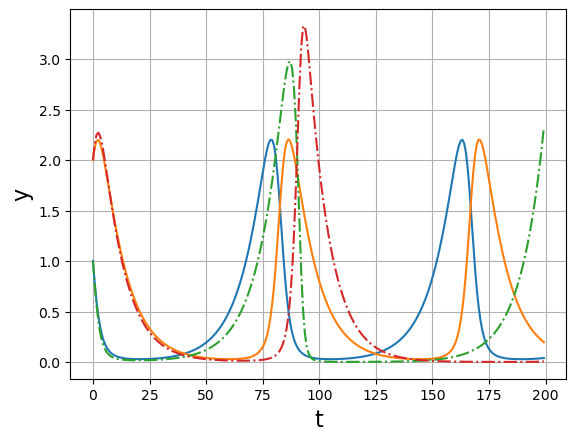

In [22]:
#THE SOLUTION
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_animal_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    ddt = np.zeros_like(y)
    x_value = y[0]
    y_value = y[1]
    ddt[0] = .1*x_value - .2*x_value*y_value
    ddt[1] = -.1*y_value + .2*x_value*y_value
    return ddt

max_time = 200
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([1,2]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_animal_dydt, [0,max_time], y0,method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], '-', label="solve_ivp")
plt.plot(solution.t, solution.y[1], '-', label="solve_ivp")
plt.grid

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
#y_solution = np.zeros_like(t_solution)
#y_solution[0] = y0
#for itime, time in enumerate(t_solution) :
    #if itime > 0 :
        #dydt = calculate_animal_dydt(time, y_solution[itime-1])
        #y_solution[itime] = y_solution[itime-1] + dydt * delta_t

#OKAY i dunno if the flat section is normal or not? will check later
y_shape = np.arange(2*N_time_steps)
y_solution = np.zeros_like(y_shape.reshape((N_time_steps,2)),dtype = float) # <- FIXED THE FLOAT THING note it
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_animal_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt* delta_t
        #print(dydt*delta_t)
        #print(y_solution)
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
#A = 1.0/y0 - 1.0
#y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
#plt.plot(t_solution, y_true, '-', label="true solution")
#plt.legend(loc='best');

C:\Users\user\AppData\Local\Temp\ipykernel_24524\2937276196.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


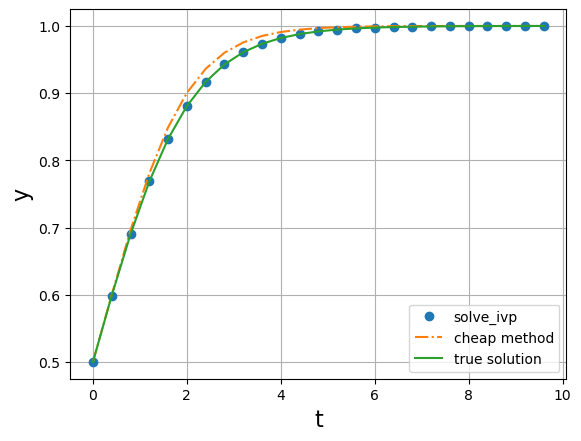

In [11]:
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
A = 1.0/y0 - 1.0
y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
plt.plot(t_solution, y_true, '-', label="true solution")
plt.legend(loc='best');

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

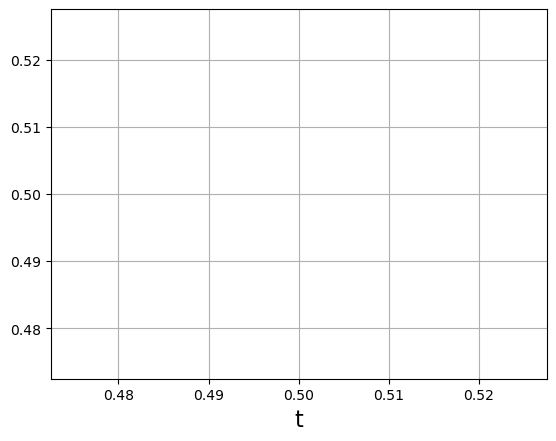

In [40]:
# Plot some solutions of x versus y

#THE SOLUTION
from scipy.integrate import solve_ivp
#For certain yo this shit implodes

# Note that the function has to take t as the first argument and y as the second
def calculate_animal_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    ddt = np.zeros_like(y,dtype = float)
    x_value = y[0]
    y_value = y[1]
    ddt[0] = .1*x_value - .2*x_value*y_value
    ddt[1] = -.1*y_value + .2*x_value*y_value
    return ddt

max_time = 200.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([.5,.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_animal_dydt, [0,max_time], y0, t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
#plt.plot(solution.t, solution.y[0], '-', label="solve_ivp")
#plt.plot(solution.t, solution.y[1], '-', label="solve_ivp")
plt.grid

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
#y_solution = np.zeros_like(t_solution)
#y_solution[0] = y0
#for itime, time in enumerate(t_solution) :
    #if itime > 0 :
        #dydt = calculate_animal_dydt(time, y_solution[itime-1])
        #y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
#plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
#A = 1.0/y0 - 1.0
#y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
#plt.plot(t_solution, y_true, '-', label="true solution")
#plt.legend(loc='best');

# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")
plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")
#THE EQUILIBRIUM VALUE IS .5,.5 WHICH I HONESTLY ONLY FIGURED OUT BY LOOKING AT HOW THE LINES WERE INTERSECTING

### ACTIVITY 6:

If you double the resolution in the simple integrator, what happens to the error in the solution compared to solve_ivp? Why? How could you improve this behaviour?

C:\Users\user\AppData\Local\Temp\ipykernel_24524\2218314209.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


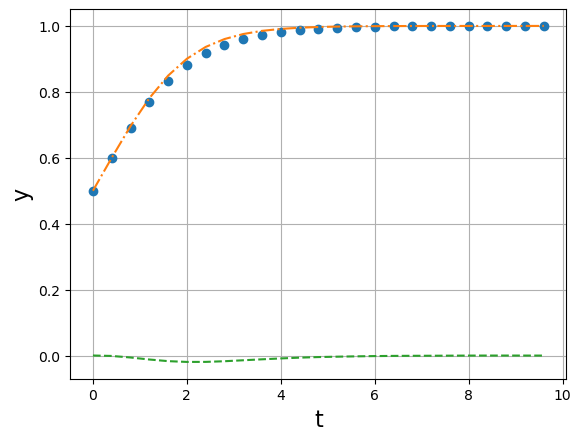

In [32]:
# Compare the errors here
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")
# HINT:
plt.plot(solution.t, solution.y[0] - y_solution, '--', label="error versus solve_ivp, dt = ??")

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

In [ ]:
# Implementation of the Ecosystem class (OPTIONAL)
